In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
df=pd.read_csv("rainfall.csv")
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [2]:
df.shape  #it is to show column and row count

(366, 12)

In [3]:
df.info() # it will show the info of the tabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [4]:
df.describe().T # it will give the statistics value

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [5]:
#Data cleaning
df.isnull().sum()   #to check the null values

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [6]:
df.columns #unnessecary space in the some columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [7]:
# removing the space using str.strip and inplace to make the changes in exixting df
df.rename(str.strip,axis=1,inplace=True)
df.columns    

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
#replacing null value in columns to mean
for col in df.columns:
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)
    
df.isnull().sum().sum()

0

In [9]:
labelencodel=LabelEncoder()
df['rainfall_encoder']=labelencodel.fit_transform(df['rainfall'])
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,rainfall_encoder
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,1
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,1
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,1
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,1


In [22]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall


In [40]:
#used strtify to proportion of each label should be same for testing and training set

X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)


In [46]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

C:\Users\Bhagy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=2)
model.fit(X_train, Y_train)

C:\Users\Bhagy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [63]:
y_pred = model.predict(X_test)

# Calculate Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix   t provides a detailed breakdown of the model's performance by comparing the predicted and actual classes and understanf the type of error 
conf_matrix = confusion_matrix(Y_test, y_pred)

# Classification Report provides a detailed breakdown of the performance of a classification model
class_report = classification_report(Y_test, y_pred)



Accuracy: 0.99


C:\Users\Bhagy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


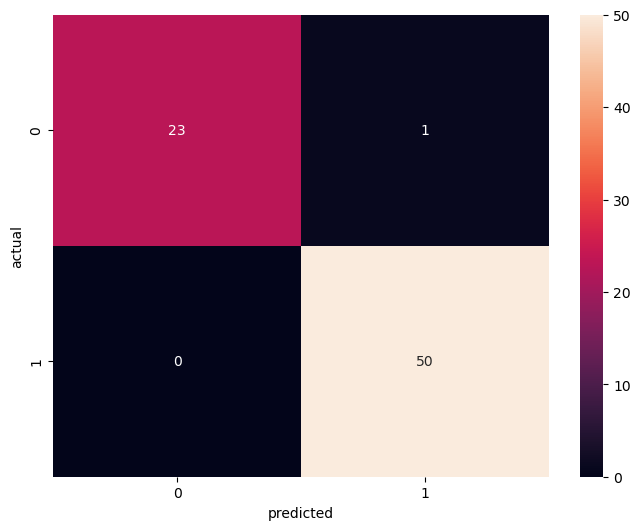

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()